In [3]:
from ase.build import bulk
from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators import morse
from quippy.potential import Potential
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/Potentials')
#pot = morse.MorsePotential()
pot2 = Potential(param_filename='Ge_2bSOAP_5000_125_216_d155/Ge_2bSOAP_5000_125_216_d155.xml')
pot_v = Potential(param_filename='Ge_2bSOAP_5000_125_216_d155_v/Ge_2bSOAP_5000_125_216_d155_v.xml')
pot_ve4 = Potential(param_filename='Ge_2bSOAP_5000_125_216_d155_ve4/Ge_2bSOAP_5000_125_216_d155_ve4.xml')

In [23]:
a = 5.6858
dia = bulk('Ge', crystalstructure='diamond', a=a, cubic=True)
dia.set_calculator(pot_ve4)
print(dia.get_potential_energy()/len(dia))
cell=dia.get_cell()

-2537.2917499095433


In [24]:
traj = Trajectory('Ge_ve4.traj', 'w')

In [22]:
ref = Atoms('Ge', cell=[[20,0,0],[0,20,0],[0,0,20]], pbc=1, calculator=pot)
e0 = ref.get_potential_energy()

In [25]:
for i in np.linspace(0.9, 1.1, 10):
    dia.set_cell(cell*i, scale_atoms=True)
    dia.get_potential_energy()
    traj.write(dia)

In [27]:
from ase.io import read
from ase.eos import EquationOfState
configs_v = read('Ge_v.traj@0:10')
volumes_v = [dia.get_volume() for dia in configs_v]
energies_v = [dia.get_potential_energy()/len(dia) for dia in configs_v]
configs = read('Ge.traj@0:10')
volumes = [dia.get_volume() for dia in configs]
energies = [dia.get_potential_energy()/len(dia) for dia in configs]
configs_ve4 = read('Ge_ve4.traj@0:10')
volumes_ve4 = [dia.get_volume() for dia in configs_ve4]
energies_ve4 = [dia.get_potential_energy()/len(dia) for dia in configs_ve4]

In [16]:
eos2 = EquationOfState(volumes, energies, eos='birchmurnaghan')
v0, e0, B = eos2.fit()
eos2.plot(ax=axs, show=False)

In [18]:
eos3 = EquationOfState(volumes_v, energies_v, eos='birchmurnaghan')
v0, e0, B = eos3.fit()
eos3.plot(ax=axs, show=True)

In [28]:

eos4 = EquationOfState(volumes_ve4, energies_ve4, eos='birchmurnaghan')
v0, e0, B = eos4.fit()
eos4.plot(ax=axs, show=True)

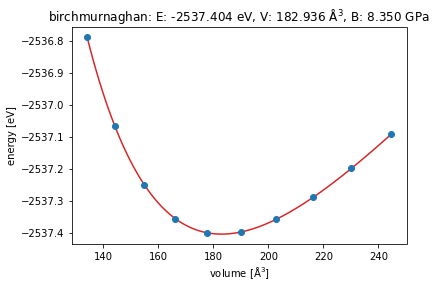

In [13]:
fig, axs = plt.subplots()
eos = EquationOfState(DFT_volumes, DFT_energies, eos='birchmurnaghan')
v0, e0, B = eos.fit()
axs = eos.plot(ax=axs, show=False)

In [89]:
dia.get_positions()

array([[0.     , 0.     , 0.     ],
       [1.01875, 1.01875, 1.01875]])

In [10]:
DFT_configs = read('/Users/Moji/Documents/Summer20/Ge/Structure_databases/dia_Evol/Ge_d_castep.traj@0:10')
DFT_volumes = [dia.get_volume() for dia in DFT_configs]
DFT_energies = [dia.get_potential_energy()/len(dia) for dia in DFT_configs]

In [9]:
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/diamond_EV.png')

In [29]:
x1,y1 = eos.getplotdata()[4:6]
x2, y2 = eos2.getplotdata()[4:6]
x3, y3 = eos3.getplotdata()[4:6]
x4, y4 = eos4.getplotdata()[4:6]

<ipython-input-32-c20d8611fd32>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


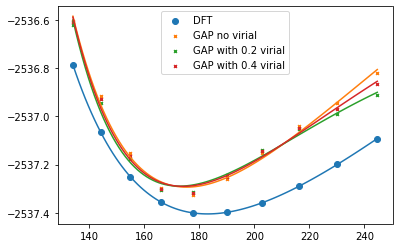

In [32]:
fig, axs = plt.subplots()
axs.scatter(DFT_volumes, DFT_energies, label='DFT')
axs.scatter(volumes, energies, label='GAP no virial', s=8, marker='x')
axs.scatter(volumes_v, energies_v, label='GAP with 0.2 virial', s=8, marker='x')
axs.scatter(volumes_ve4, energies_ve4, label='GAP with 0.4 virial', s=8, marker='x')
axs.plot(x1, y1)
axs.plot(x2, y2)
axs.plot(x3,y3)
axs.plot(x4,y4)
axs.legend()
#axs.text(140, -2.029e4 - 3, 'Birch-Murnaghan fit for diamond Ge')
fig.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/diamond_EV.png')
